In [12]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [13]:
# 构造数据集
def synthetic_data(w, b, num_examples):
    # 生成 y = x*w + b + 噪声
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [14]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.6093,  1.8059]) 
label: tensor([-3.1540])


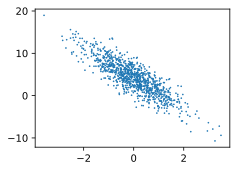

In [15]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 0.5)

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本，没有顺序
    random.shuffle(indices)    # 打乱顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])  # 注意这里min（）作用是如果没有i+batch_size超出了总的数量，就取到最后
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[-0.1112,  1.5241],
        [-0.5382,  1.0959],
        [ 0.0866, -0.2266],
        [ 1.9052,  0.1368],
        [-0.2707,  0.5461],
        [-1.8246,  1.4121],
        [ 0.7704, -0.9451],
        [ 0.4520, -2.1976],
        [ 0.5322,  1.2469],
        [ 0.2031, -0.7590]]) 
 tensor([[-1.2052],
        [-0.6104],
        [ 5.1473],
        [ 7.5398],
        [ 1.8104],
        [-4.2631],
        [ 8.9637],
        [12.5689],
        [ 1.0290],
        [ 7.1849]])


In [17]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
# b设置为初始值为0的标量
b = torch.zeros(1, requires_grad=True)

In [18]:
def linear_regression(x, w, b):
    # 线性模型
    return torch.matmul(x, w) + b

In [19]:
# 损失函数
def squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [20]:
# 定义优化算法
def sgd(params, lr, batch_size):
    # 小批量随机梯度下降
    with torch.no_grad():   # 更新的时候不需要梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()    # 每更新一次参数，都要让对应的梯度清零

In [21]:
lr = 0.01
num_epochs = 30
net = linear_regression
loss = squared_loss
optimer = sgd

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        optimer([w, b], lr, batch_size)  # 优化
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 2.214320
epoch2, loss 0.297521
epoch3, loss 0.040036
epoch4, loss 0.005428
epoch5, loss 0.000773
epoch6, loss 0.000146
epoch7, loss 0.000063
epoch8, loss 0.000052
epoch9, loss 0.000050
epoch10, loss 0.000050
epoch11, loss 0.000050
epoch12, loss 0.000050
epoch13, loss 0.000050
epoch14, loss 0.000050
epoch15, loss 0.000050
epoch16, loss 0.000050
epoch17, loss 0.000050
epoch18, loss 0.000050
epoch19, loss 0.000050
epoch20, loss 0.000050
epoch21, loss 0.000050
epoch22, loss 0.000050
epoch23, loss 0.000050
epoch24, loss 0.000050
epoch25, loss 0.000050
epoch26, loss 0.000050
epoch27, loss 0.000050
epoch28, loss 0.000050
epoch29, loss 0.000050
epoch30, loss 0.000050


In [22]:
# 评估
print(f"w的估计误差: {true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差: {true_b - b}")

w的估计误差: tensor([ 0.0002, -0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0003], grad_fn=<RsubBackward1>)
